In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
fruits_2d[0:5]

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pca.fit(fruits_2d)
print(pca.components_.shape)

(20, 10000)


In [19]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if 10 * i + j < n:
                axs[i][j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

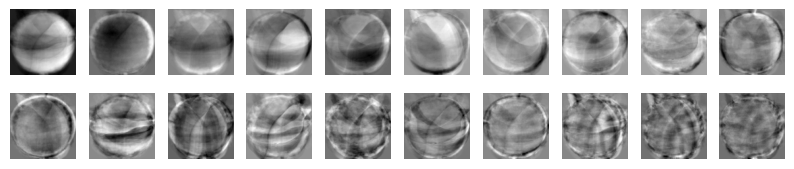

In [20]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 20)


(300, 10000)


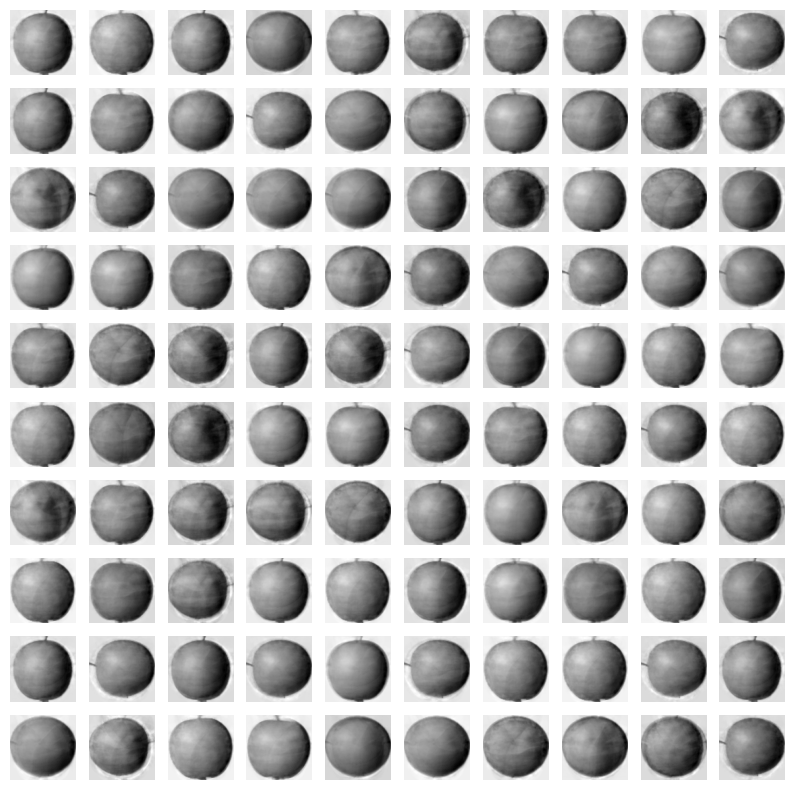

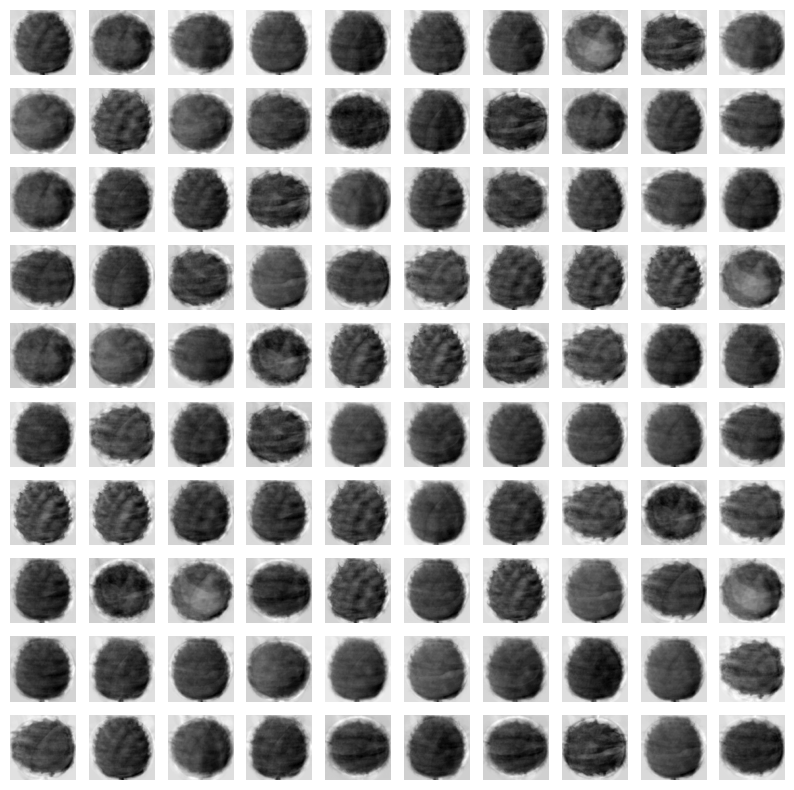

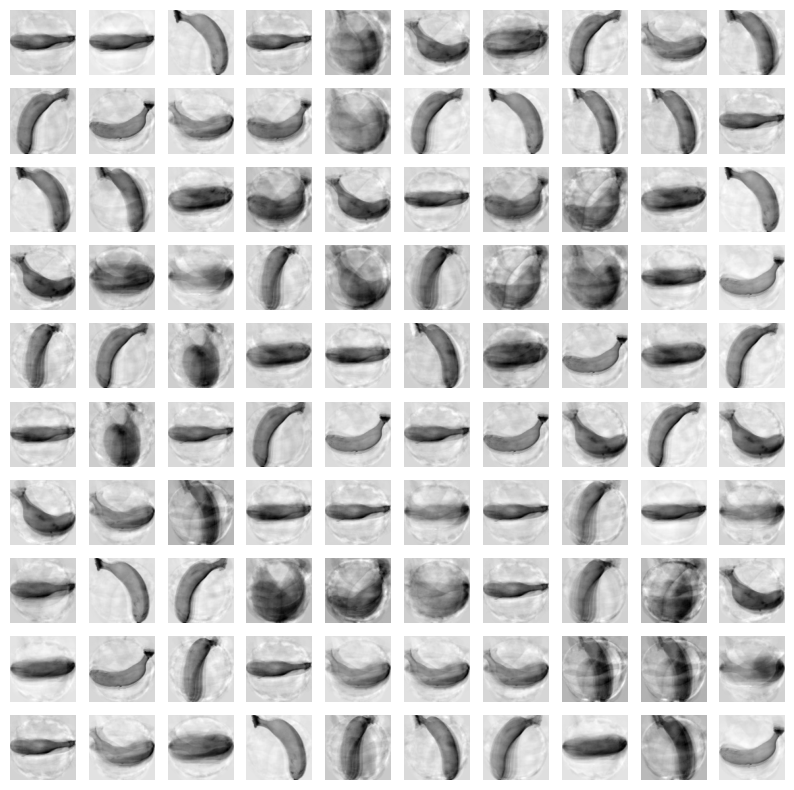

In [22]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start: start+100])
    print('\n')

0.8416571880052492


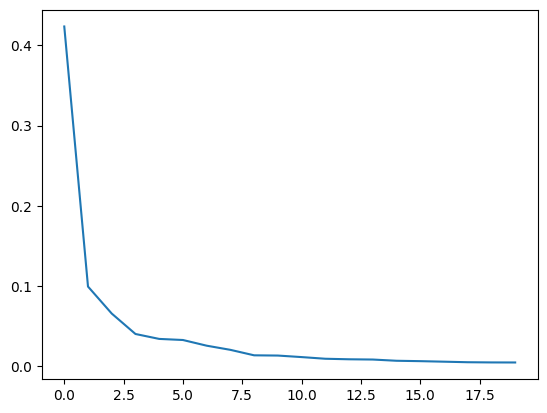

In [23]:
print(np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

In [30]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
print(fruits_2d.shape)

0.9966666666666667
1.7020883083343505
(300, 10000)


In [31]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02926640510559082


In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


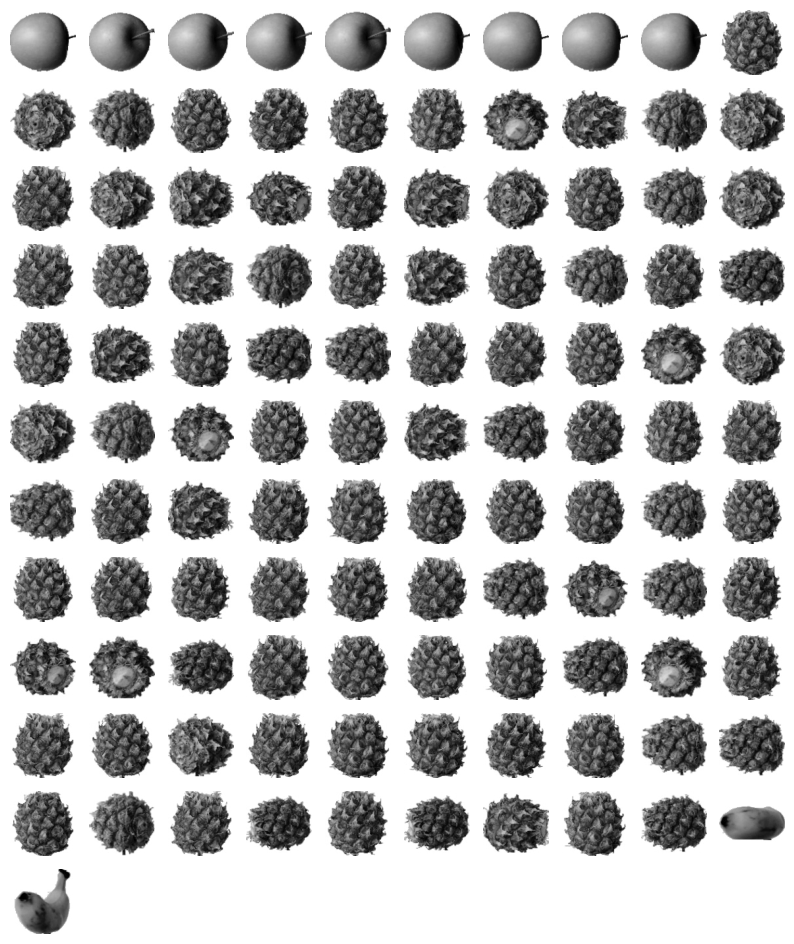

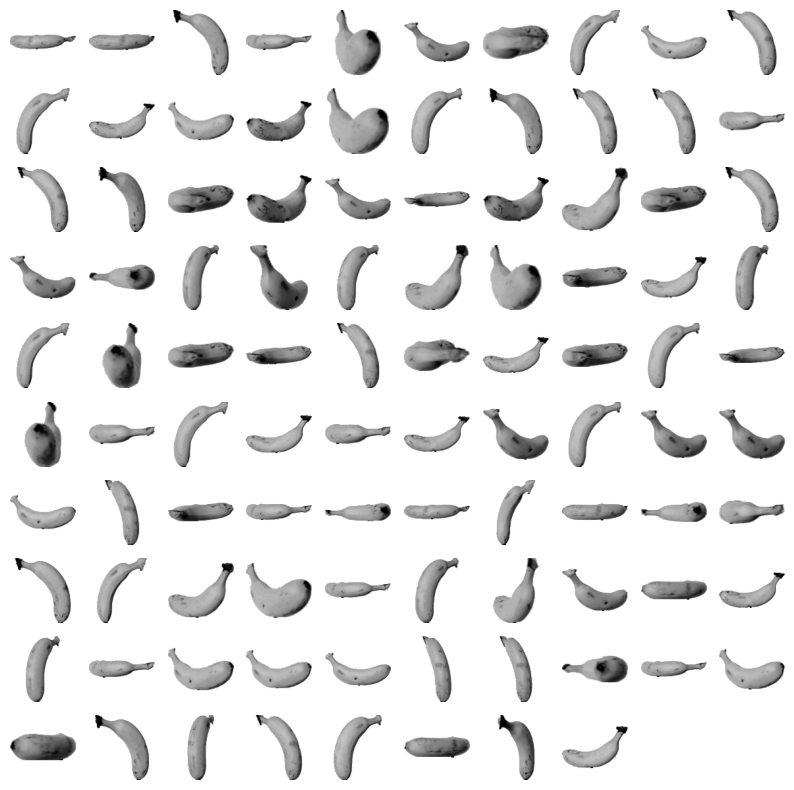

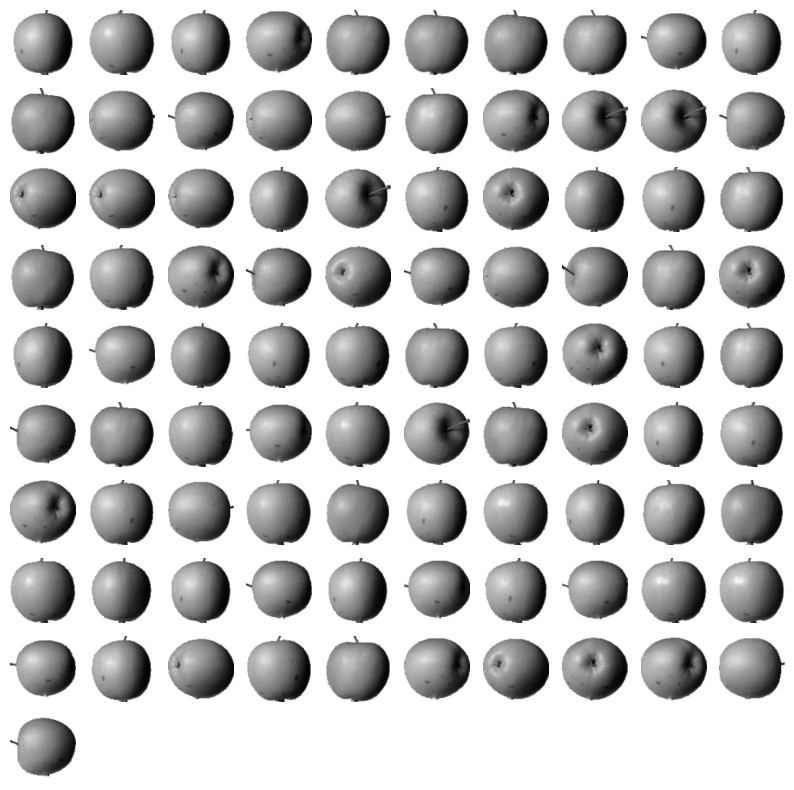

In [33]:
for label in [0,1,2]:
    draw_fruits(fruits[km.labels_ == label])

In [40]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

2


(300, 2)

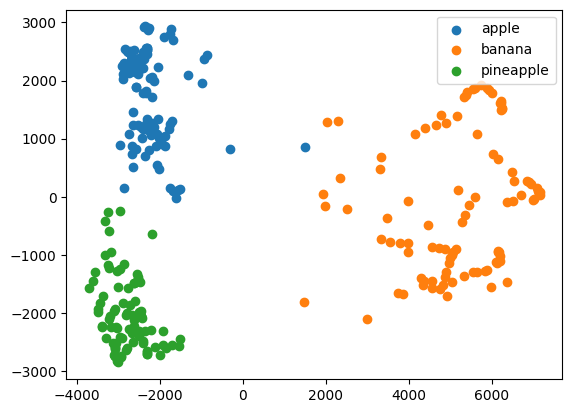

In [42]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()